#DenseNet on CIFAR - 10 dataset

> In a learnable approach brought you by Jayati Vijaywargiya

>>https://scholar.google.com/citations?hl=en&authuser=2&user=T-BRmqgAAAAJ


#Step 1: Importing libraries
>Here we have used following libraries
>> For better understanding it is recommended to read the text below, if you are already well acquainted - PLEASE SKIP.....
>>>1. Keras: Keras is a neural networks library written in Python, simple and 
instinctual to use
>>>2. Tensorflow: Python library for fast numerical computing, it  is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow
>>>Here Keras is used as a library over tensorflow
>>>3. matplotlib.pyplot is a collection of functions and is used to create a figure, create a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc
>>>4. keras.layers, keras.models are used to create and implement deep neural models, and they have relevant functionalities like 2D convolution, max pooling, average pooling, batch normalization, activation functions like ReLu, etc.
>>>5. Python pickle module is used for serializing and de-serializing python object structures. The process to converts any kind of python objects (list, dict, etc.) into byte streams (0s and 1s) is called pickling or serialization or flattening or marshalling

In [2]:
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU 
import matplotlib.pyplot as plt
import pickle


#Step 2: Loading CIFAR - 10 dataset
> About CIFAR - 10 dataset:
>> It is collection of 60,000 images 
>>> They are classified into 10 different classes
>>>> The classes are :  airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.
>>>>> Data is divided into training and testing data
>>>>>> The dataset has 50,000 training data and 10,000 testing data
>>>>>>> Each image / data is of size 32*32*3 

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


#Step 3.  Plotting or vizualizing the dataset
Here we have used matplotlib.pyplot and have displayed, first 100 images in the traing datset

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


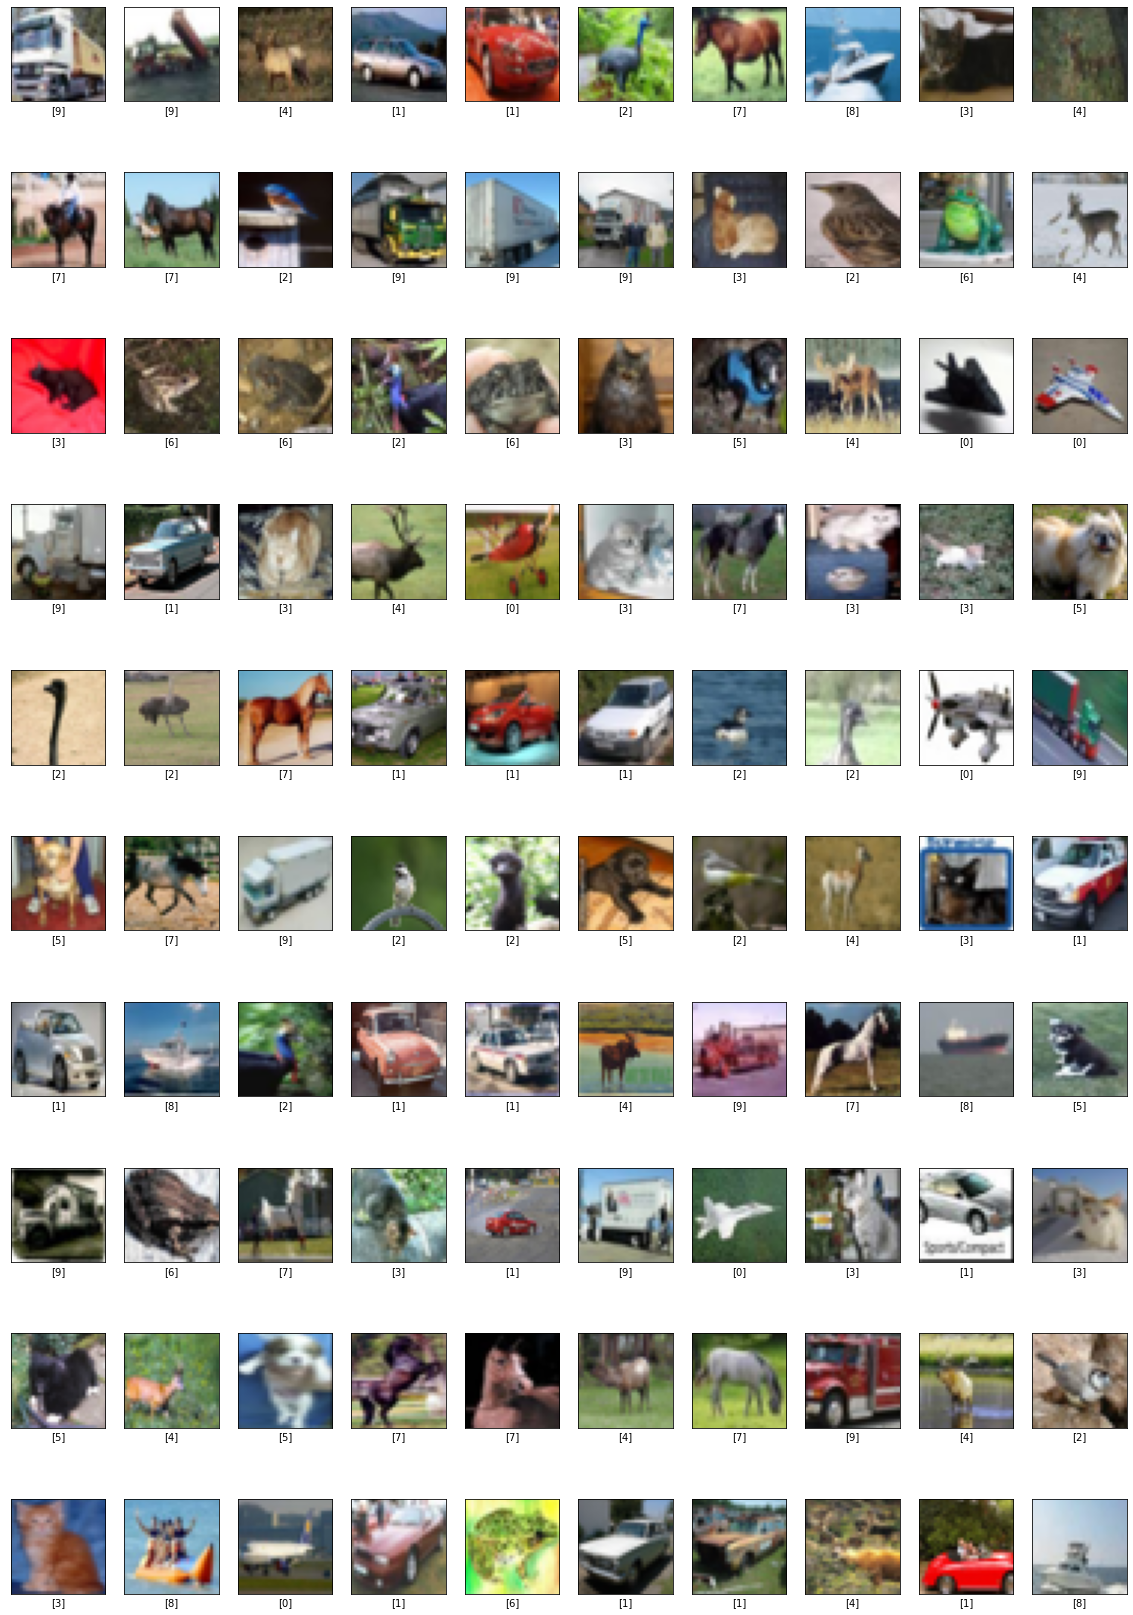

In [14]:
plt.figure(figsize=(20,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+1], cmap=plt.cm.binary)
    plt.xlabel(y_train[i+1])
plt.show()

# Densenet
> 1. It is mainly used for object detection
> 2. It is one of the classic networks
> 3. The network consist of 5 layers of dense block
> 4. Here, output of the previous layer acts as an input of the second layer by using composite function operation. 
> 5. Composite operation consists of the convolution layer, pooling layer, batch normalization, and non-linear activation layer.
> 6. It also has different versions like, DenseNet-121, DenseNet-160, DenseNet-201, etc

# Lets get started with the implementation

In [4]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s,  padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

# DenseNet architechture
The above architechture can be intuited as :
>>A convolution layer -> Pooling layer 0 -> Dense block -> Transition layer -> Dense block -> transition layer -> ( Multiple layers of Dense block followed by transiion layer) ->  Average pooling layer taking input as the output of last transition layer -> Fully connected layer which is the last layer or the output layer


>>>Each dense block layer for repeated times :
>>>Does,
>>>> Batch normalization
>>>>> Relu activation 
>>>>>>2D convolution 
>>>>>>>on the input tensor(x) 

>>> Each transition layer has a,
>>>>A convolution layer
>>>>>and a Average pooling layer

>>The network ends with a fully connected dense layer which uses a softmax function to do the classification

In [5]:
input_shape = 256, 256, 3     
n_classes = 10
model = densenet(input_shape, n_classes)
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train,epochs=30,validation_data=(x_test,y_test))


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 64, 64)   256         max_pooling2d[0][0]              
_______________________________________________________________________________________

# Let us see the accuracy of the Densenet

Text(0.5, 1.0, 'CIFAR10 densenet')

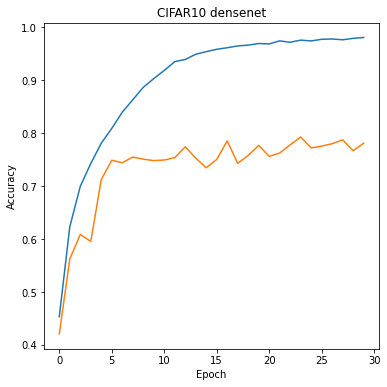

In [6]:
plt.figure(figsize=(6,6))
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['Test accuracy'], label = 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CIFAR10 densenet')

This was all about Densenet on CIFAR - 10 Dataset

# Hope you like it ........To know more subscribe to our channel https://www.youtube.com/channel/UCfcRI0zl9RMOR11fHtAz2VQ